# Probability Distribution Exercises

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import env

In [2]:
# Use `plt.rcParams` to set a default chart parameters
plt.rc('figure', figsize=(16,9))
plt.rc('axes.spines', top=False, right=False)
plt.rc('patch', ec='black', force_edgecolor=True)
plt.rc('font', size=16)

# 1.
A bank found that the average number of cars waiting during the noon hour at a drive-up window follows a __poisson distribution__ with a `mean` of 2 cars.

>__Make a chart of this distribution__ and answer these questions concerning the probability of cars waiting at the drive-up window.
``` python
stats.poisson?
```

In [3]:
# Use the stats module to create distributions
# Observations OVER TIME are represented with a Poisson Distribution
# mu (mean) set to 2 model the data.

number_of_cars = stats.poisson(mu=2)

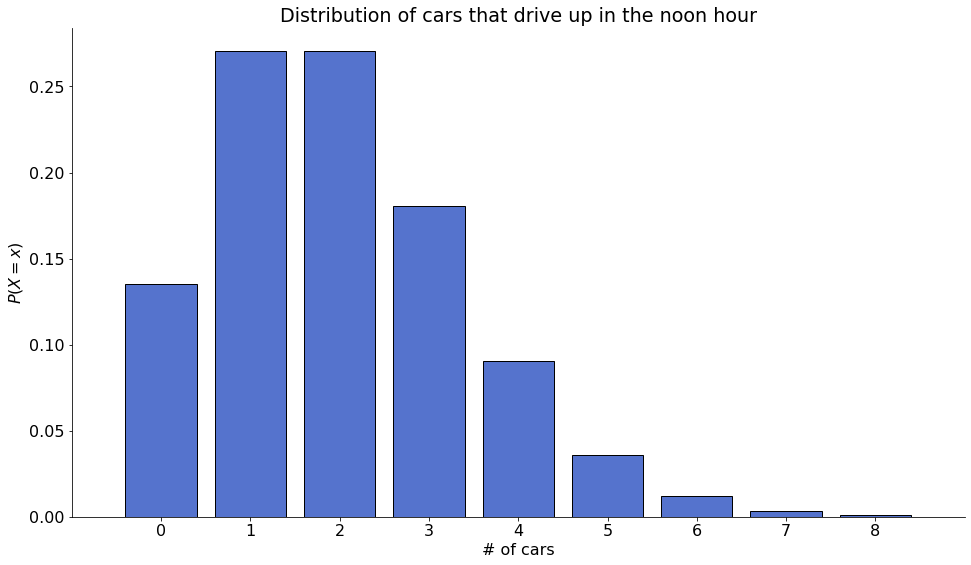

In [4]:
x = np.arange(0, 9)
y = number_of_cars.pmf(x)

# Histogram chart of our Poisson Distribution
sns.barplot(x, y, edgecolor='black', color="Royalblue")

# Create chart labels to describe the data
plt.title("Distribution of cars that drive up in the noon hour")
plt.xlabel("# of cars")
plt.ylabel("$P(X = x)$")

plt.xticks(np.arange(0,9))
plt.xlim(-1,9);

>What is the probability that __no cars__ drive up in the noon hour?

In [5]:
# Use `.pmf()` when using discrete data.
no_cars = number_of_cars.pmf(0)  # Set to 0 to represent zero cars.

# Answer:
print("The probability that no cars drive up in the noon hour: {0:.2%}".format(no_cars))

The probability that no cars drive up in the noon hour: 13.53%


>What is the probability that __3 or more cars__ come through the drive through?

```python
stats.poisson.sf?
```

In [6]:
# Use the Survival Function to find the probability of values greater than a value.
# `.sf()` is inclusive so -> n-1
three_or_more_cars = number_of_cars.sf(2)  # n=3, 3-1

# Answer:
print("""
The probability that more than three or more cars drive up in the noon hour: {0:.2%}
""".format(three_or_more_cars))


The probability that more than three or more cars drive up in the noon hour: 32.33%



In [7]:
# Survival Function `.sf()` is the same as 1-`.cdf()`
round(1 - number_of_cars.cdf(2), 2) == round(number_of_cars.sf(2), 2)

True

>How likely is it that the drive through gets __at least__ 1 car?

In [8]:
at_least_one_car = number_of_cars.sf(0)

# Answer:
print("""
The probability that at least 1 car will drive up in the noon hour: {0:.2%}
""".format(at_least_one_car))


The probability that at least 1 car will drive up in the noon hour: 86.47%



# 2.
> Grades of State University graduates are _normally distributed_ with a `mean` of 3.0 and a `standard deviation` of .3.

```python
stats.norm?
```

In [9]:
gpas = stats.norm(loc=3, scale=.3)

Calculate the following:
> What grade point average is required to be in the __top 5%__ of the graduating class?

In [10]:
top_5_pct = gpas.isf(.05)

print("""
A GPA of {0:.3f} is required to be in the top 5% of the graduating class.
""".format(top_5_pct))


A GPA of 3.493 is required to be in the top 5% of the graduating class.



> What GPA constitutes the __bottom 15%__ of the class?

In [11]:
# Percent Point Function, `.ppf()` accepts a probability and returns a value at
# that quartile/probability.
# Note: I tried to get the ppf of 0, but was -inf was returned. GPA's are
# continuous values, not discrete.
bottom_15_pct = gpas.ppf(.15)

# Answer:
print("""
A GPA of {0:.3f} constitutes the bottom 15% of the graduating class.
""".format(bottom_15_pct))


A GPA of 2.689 constitutes the bottom 15% of the graduating class.



> An eccentric alumnus left scholarship money for students in the __third decile from the bottom__ of their class. __Determine the range of the third decile__. 

> Would a student with a 2.8 grade point average qualify for this scholarship?

In [12]:
third_decile = gpas.ppf([.2, .3])

print("""
A GPA between {0:.3f} and {1:.3f} is required to qualify for the scholarship.
""".format(third_decile[0], third_decile[1]))
print("A student with a GPA of 2.8 qualifies for this scholarship.")


A GPA between 2.748 and 2.843 is required to qualify for the scholarship.

A student with a GPA of 2.8 qualifies for this scholarship.


>If I have a GPA of 3.5, what percentile am I in?

In [13]:
gpa = 3.5
gpa_percentile = gpas.cdf(gpa)
print("""
A GPA of {0:.1f} is in the {1:0.0f}th percentile.
""".format(gpa, gpa_percentile*100))


A GPA of 3.5 is in the 95th percentile.



# 3.
> A marketing website has an average click-through rate of 2%. One day they observe 4326 visitors and 97 click-throughs. How likely is it that this many people or more click through?
``` python
stats.binom?
```

In [14]:
# Generate a distribution representing the number of visitors with probability
# of a 'click through'.
marketing = stats.binom(n=4326, p=.02)

In [20]:
p_clicks = marketing.sf(96)

print("""
The probability that 97 or more visitors click-through: {:.2%}
""".format(p_clicks))


The probability that 97 or more visitors click-through: 13.98%



# 4.
> You are working on some statistics homework consisting of 100 questions where all of the answers are a probability rounded to the `hundreths` place. Looking to save time, you put down random probabilities as the answer to each question.

In [21]:
homework = stats.binom(n=60, p=.01)

>What is the probability that at least one of your first 60 answers is correct?

In [22]:
at_least_one_correct = homework.sf(0)

print("""
The probability that at least one of the first 60 answers is correct: {:.2%}
""".format(at_least_one_correct))


The probability that at least one of the first 60 answers is correct: 45.28%



# 5.
> The codeup staff tends to get upset when the student break area is not cleaned up. Suppose that there's a 3% chance that any one student cleans the break area when they visit it, and, on any given day, about 90% of the 3 active cohorts of 22 students visit the break area. 

In [23]:
prob_clean = .03
students = round(.90 * 3 * 22)
break_area = stats.binom(students, prob_clean)

> How likely is it that the break area gets cleaned up each day?

In [24]:
clean_day = break_area.sf(0)

print("""
The probability that at the break area is cleaned each day: {:.2%}
""".format(clean_day))


The probability that at the break area is cleaned each day: 83.42%



> How likely is it that it goes two days without getting cleaned up?

In [25]:
two_days = stats.binom(students*2, prob_clean)
two_unclean = 1 - two_days.sf(0)

print("""
The probability that the break area is not cleaned for two days: {:.2%}
""".format(two_unclean))


The probability that the break area is not cleaned for two days: 2.75%



> All week?

In [26]:
week = stats.binom(students * 5, prob_clean)
week_unclean = 1 - week.sf(0)

print("""
The probability that at the break area is not cleaned for a week: {:.2%}
""".format(week_unclean))


The probability that at the break area is not cleaned for a week: 0.01%



# 6.
> You want to get lunch at La Panaderia, but notice that the line is usually very long at lunchtime. After several weeks of careful observation, you notice that the average number of people in line when your lunch break starts is __normally distributed__ with a `mean` of 15 and `standard deviation` of 3.

>If it takes 2 minutes for each person to order, and 10 minutes from ordering to getting your food, what is the likelihood that you have at least 15 minutes left to eat your food before you have to go back to class? 

> Assume you have one hour for lunch, and ignore travel time to and from La Panaderia.

In [27]:
prob_lunch = ((60-((stats.norm(loc=15, scale=3).rvs(100_000)*2) + 10)) >= 15).mean()

print("""
The probability that I will have at least 15 minutes to eat before class: {:.2%}
""".format(prob_lunch))


The probability that I will have at least 15 minutes to eat before class: 79.90%



Assume that the time it takes to order and eat the burger special at the Esquire is normally distributed with a mean of 40 minutes and a standard deviation of 15 minutes. If it takes 5 minutes to walk from Codeup to the restaurant, what is the likelihood that you can go eat at The Esquire during your lunch hour and not be late back to class?

In [15]:

mu_minutes = 40
sd_minutes = 15
lunch_minutes = 60
walk_minutes = 5

allotted_time = lunch_minutes - walk_minutes
lunch = stats.norm(mu_minutes, sd_minutes)
prob_lunch = lunch.cdf(allotted_time)

print("""
The probability that I will have at least 15 minutes to eat before class: {:.2%}
""".format(prob_lunch))


The probability that I will have at least 15 minutes to eat before class: 84.13%



In [28]:
mu_minutes = 15 * 2
sd_minutes = 3 * 2
lunch_minutes = 60
food_prep_minutes = 10
eat_minutes = 15

allotted_time = lunch_minutes - food_prep_minutes - eat_minutes
lunch = stats.norm(mu_minutes, sd_minutes)
prob_lunch = lunch.cdf(allotted_time)

print("""
The probability that I will have at least 15 minutes to eat before class: {:.2%}
""".format(prob_lunch))


The probability that I will have at least 15 minutes to eat before class: 79.77%



# 7.
> Connect to the `employees database` and find the __average salary of current employees__, along with the `standard deviation`. For the following questions, calculate the answer based on modeling the employees salaries with a __normal distribution__ defined by the calculated `mean` and `standard deviation` then _compare_ this answer to the actual values present in the `salaries` dataset.
```python
stats.norm?
```

In [29]:
df_c_salaries = pd.read_csv('current_salaries.csv')

In [30]:
mu = df_c_salaries.salary.mean()
sd =df_c_salaries.salary.std()
c_salaries = stats.norm(loc=mu,scale=sd)

>What percent of employees earn less than 60,000?

In [31]:
less_than_60k = c_salaries.cdf(60000)

print("""
{:.2%} of employees earn less than $60,000
""".format(less_than_60k))


24.39% of employees earn less than $60,000



>What percent of employees earn more than 95,000?

In [32]:
more_than_95k = c_salaries.sf(95000)

print("""
{:.2%} of employees earn more than $95,000
""".format(more_than_95k))


9.21% of employees earn more than $95,000



>What percent of employees earn between 65,000 and 80,000?

In [33]:
between_65k_and_80k = np.diff(c_salaries.cdf([65000,80000]))[0]

print("""
{:.2%} of employees earn between $65,000 and $80,000
""".format(between_65k_and_80k))


33.51% of employees earn between $65,000 and $80,000



>What do the top 5% of employees make?

In [34]:
upper_limit = df_c_salaries.salary.max()
lower_limit = c_salaries.isf(.05)

print("""
The top 5% of employees earn between ${:,.2f} and ${:,.2f}
""".format(lower_limit, upper_limit))


The top 5% of employees earn between $100,484.64 and $158,220.00

